In [5]:
import s3fs
import xarray as xr

In [13]:
client_kwargs={'endpoint_url': 'https://pangeo-eosc-minioapi.vm.fedcloud.eu/'}


s3 = s3fs.S3FileSystem(anon=True, client_kwargs=client_kwargs)

filename = "s3://afouilloux-fair2adapt/10.11582_2024.00093/N1850_f19_tn14_20190722/ocn/hist/N1850_f19_tn14_20190722.micom.hbgcd.1801-01.nc"

s3.ls(filename)

['afouilloux-fair2adapt/10.11582_2024.00093/N1850_f19_tn14_20190722/ocn/hist/N1850_f19_tn14_20190722.micom.hbgcd.1801-01.nc']

In [15]:
ds = xr.open_dataset(s3.open(filename))
ds

<xarray.Dataset> Size: 103MB
Dimensions:     (time: 31, sigma: 53, depth: 70, bounds: 2, y: 385, x: 360)
Coordinates:
  * time        (time) object 248B 1801-01-01 12:00:00 ... 1801-01-31 12:00:00
  * sigma       (sigma) float64 424B 27.22 27.72 28.2 28.68 ... 37.48 37.58 37.8
  * depth       (depth) float64 560B 0.0 5.0 10.0 ... 6.25e+03 6.5e+03 6.75e+03
Dimensions without coordinates: bounds, y, x
Data variables:
    depth_bnds  (depth, bounds) float64 1kB ...
    co2fxd      (time, y, x) float32 17MB ...
    co2fxu      (time, y, x) float32 17MB ...
    srfdissic   (time, y, x) float32 17MB ...
    srftalk     (time, y, x) float32 17MB ...
    srfphyc     (time, y, x) float32 17MB ...
    ppint       (time, y, x) float32 17MB ...

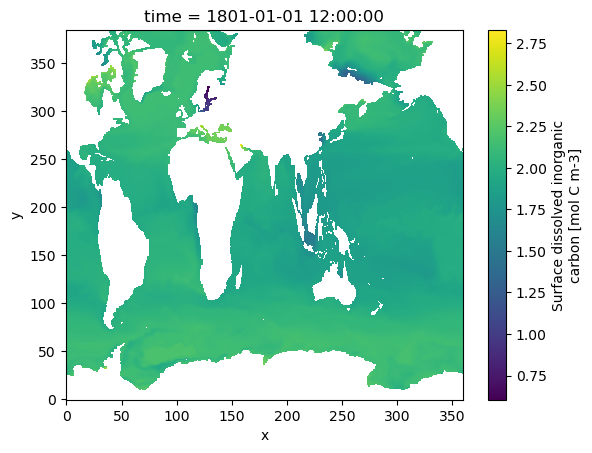

In [18]:
ds.srfdissic.isel(time=0).plot()

In [19]:
filename = "s3://afouilloux-fair2adapt/10.11582_2024.00093/N1850_f19_tn14_20190722/atm/hist/N1850_f19_tn14_20190722.cam.h0.1801-01.nc"


In [20]:
ds = xr.open_dataset(s3.open(filename))
ds

<xarray.Dataset> Size: 583MB
Dimensions:               (lat: 96, zlon: 1, nbnd: 2, lon: 144, lev: 32,
                           ilev: 33, time: 1)
Coordinates:
  * lat                   (lat) float64 768B -90.0 -88.11 -86.21 ... 88.11 90.0
  * zlon                  (zlon) float64 8B 0.0
  * lon                   (lon) float64 1kB 0.0 2.5 5.0 ... 352.5 355.0 357.5
  * lev                   (lev) float64 256B 3.643 7.595 14.36 ... 976.3 992.6
  * ilev                  (ilev) float64 264B 2.255 5.032 10.16 ... 985.1 1e+03
  * time                  (time) object 8B 1801-02-01 00:00:00
Dimensions without coordinates: nbnd
Data variables: (12/1194)
    zlon_bnds             (zlon, nbnd) float64 16B ...
    gw                    (lat) float64 768B ...
    hyam                  (lev) float64 256B ...
    hybm                  (lev) float64 256B ...
    P0                    float64 8B ...
    hyai                  (ilev) float64 264B ...
    ...                    ...
    mmr_OM                (time, lev, lat, lon) float32 2MB ...
    mmr_SALT              (time, lev, lat, lon) float32 2MB ...
    mmr_SULFATE           (time, lev, lat, lon) float32 2MB ...
    monoterp              (time, lev, lat, lon) float32 2MB ...
    monoterp_SRF          (time, lat, lon) float32 55kB ...
    ozone                 (time, lev, lat, lon) float32 2MB ...
Attributes:
    Conventions:       CF-1.0
    source:            CAM
    case:              N1850_f19_tn14_20190722
    logname:           olivie
    host:              
    initial_file:      /cluster/shared/noresm/inputdata/atm/cam/inic/fv/cami-...
    topography_file:   /cluster/shared/noresm/inputdata/atm/cam/topo/fv_1.9x2...
    model_doi_url:     https://doi.org/10.5065/D67H1H0V
    time_period_freq:  month_1

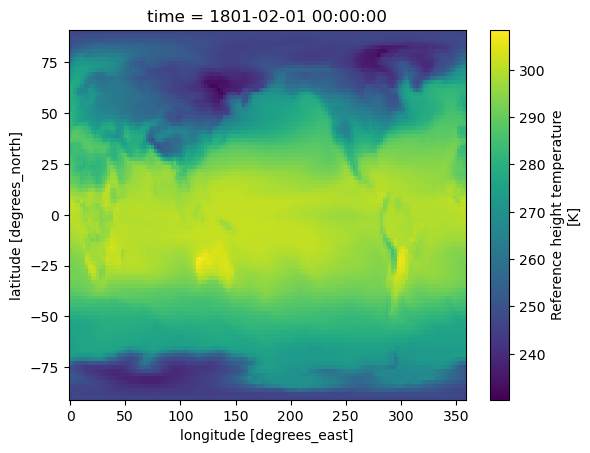

In [21]:
ds.TREFHT.isel(time=0).plot()